## Upload Files & Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import io

uploaded = files.upload()
# daily_am = pd.read_csv(io.BytesIO(uploaded['4_month_daily_am.csv']))
daily_am = pd.read_csv(io.BytesIO(uploaded['6_month_daily_am.csv']))

Saving 6_month_daily_am.csv to 6_month_daily_am (1).csv


In [ ]:
uploaded = files.upload()
# daily_pm = pd.read_csv(io.BytesIO(uploaded['4_month_daily_pm.csv']), sep=',', encoding='cp1252')
daily_pm = pd.read_csv(io.BytesIO(uploaded['6_month_daily_pm.csv']), sep=',', encoding='cp1252')

Saving 6_month_daily_pm.csv to 6_month_daily_pm (1).csv


In [ ]:
uploaded = files.upload()
# daily_end = pd.read_csv(io.BytesIO(uploaded['4_month_daily_end.csv']))
daily_end = pd.read_csv(io.BytesIO(uploaded['6_month_daily_end.csv']))

Saving 6_month_daily_end.csv to 6_month_daily_end (1).csv


In [ ]:
uploaded = files.upload()
friday_am = pd.read_csv(io.BytesIO(uploaded['6_month_friday_am.csv']))

Saving 6_month_friday_am.csv to 6_month_friday_am (1).csv


In [ ]:
uploaded = files.upload()
friday_pm = pd.read_csv(io.BytesIO(uploaded['6_month_friday_pm.csv']), encoding= 'unicode_escape')

Saving 6_month_friday_pm.csv to 6_month_friday_pm (1).csv


In [ ]:
uploaded = files.upload()
friday_end = pd.read_csv(io.BytesIO(uploaded['6_month_friday_end.csv']))

Saving 6_month_friday_end.csv to 6_month_friday_end (1).csv


In [ ]:
uploaded = files.upload()
comp_ws = pd.read_csv(io.BytesIO(uploaded['6_month_comp_ws.csv']))

Saving 6_month_comp_ws.csv to 6_month_comp_ws (1).csv


In [ ]:
uploaded = files.upload()
demographics = pd.read_csv(io.BytesIO(uploaded['demographics.csv']))
demographics = demographics.rename(columns={'Mobile ID': 'mbl_cod', 'Age ': 'Age'})

Saving demographics.csv to demographics (1).csv


In [ ]:
# Merge demographic data with daily/friday data

daily_am = pd.merge(daily_am, demographics, how='left', on='mbl_cod')
daily_pm = pd.merge(daily_pm, demographics, how='left', on='mbl_cod')
daily_end = pd.merge(daily_end, demographics, how='left', on='mbl_cod')

friday_am = pd.merge(friday_am, demographics, how='left', on='mbl_cod')
friday_pm = pd.merge(friday_pm, demographics, how='left', on='mbl_cod')
friday_end = pd.merge(friday_end, demographics, how='left', on='mbl_cod')

In [ ]:
daily_am['local_time'] = pd.to_datetime(daily_am['local_time'])
daily_pm['local_time'] = pd.to_datetime(daily_pm['local_time'])
daily_end['local_time'] = pd.to_datetime(daily_end['local_time'])

daily_am['Week'] = daily_am['local_time'].dt.isocalendar().week
daily_pm['Week'] = daily_pm['local_time'].dt.isocalendar().week
daily_end['Week'] = daily_end['local_time'].dt.isocalendar().week

friday_am['local_time'] = pd.to_datetime(friday_am['local_time'])
friday_pm['local_time'] = pd.to_datetime(friday_pm['local_time'])
friday_end['local_time'] = pd.to_datetime(friday_end['local_time'])

friday_am['Week'] = friday_am['local_time'].dt.isocalendar().week
friday_pm['Week'] = friday_pm['local_time'].dt.isocalendar().week
friday_end['Week'] = friday_end['local_time'].dt.isocalendar().week

In [ ]:
friday_am_weeks = friday_am['Week'].max() - friday_am['Week'].min()

friday_am['TOTAL_NUM_LOCATIONS'] = friday_am.groupby(['rsp_id'])['LOCATION_AM'].transform('count')
friday_am['AVG_NUM_LOCATIONS'] = friday_am['TOTAL_NUM_LOCATIONS'] // friday_am_weeks

In [ ]:
bins = [20, 26, 31, 36, 41, 46, 51, 56, 61, 66]
labels = ['21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65']

daily_am['AGE_GROUP'] = pd.cut(daily_am['Age'], bins=bins, labels=labels, right=False)
daily_pm['AGE_GROUP'] = pd.cut(daily_pm['Age'], bins=bins, labels=labels, right=False)
daily_end['AGE_GROUP'] = pd.cut(daily_end['Age'], bins=bins, labels=labels, right=False)

friday_am['AGE_GROUP'] = pd.cut(friday_am['Age'], bins=bins, labels=labels, right=False)
friday_pm['AGE_GROUP'] = pd.cut(friday_pm['Age'], bins=bins, labels=labels, right=False)
friday_end['AGE_GROUP'] = pd.cut(friday_end['Age'], bins=bins, labels=labels, right=False)

In [ ]:
daily_am['Date'] = daily_am['local_time'].dt.date
daily_pm['Date'] = daily_pm['local_time'].dt.date
daily_end['Date'] = daily_end['local_time'].dt.date

friday_am['Date'] = friday_am['local_time'].dt.date
friday_pm['Date'] = friday_pm['local_time'].dt.date
friday_end['Date'] = friday_end['local_time'].dt.date

## Initial Insights

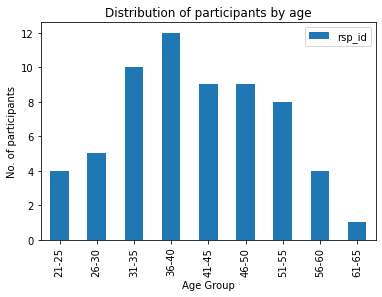

In [ ]:
age_grouped = friday_end.groupby('AGE_GROUP').agg({'rsp_id': pd.Series.nunique})
age_grouped.plot(kind='bar')
plt.title('Distribution of participants by age')
plt.xlabel('Age Group')
plt.ylabel('No. of participants')
plt.show()

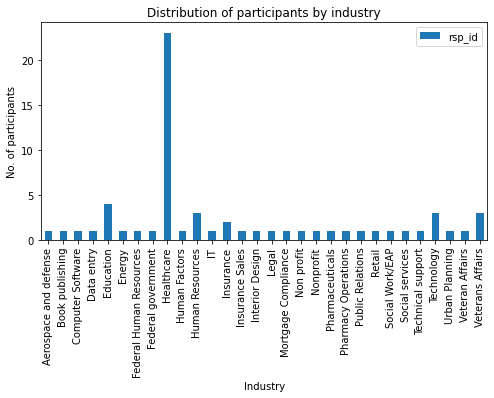

In [ ]:
industry_grouped = friday_end.groupby('Industry').agg({'rsp_id': pd.Series.nunique})
industry_grouped.plot(kind='bar', figsize=(8,4))
plt.title('Distribution of participants by industry')
plt.xlabel('Industry')
plt.ylabel('No. of participants')
plt.show()

## Initial Insights related to Work Station data

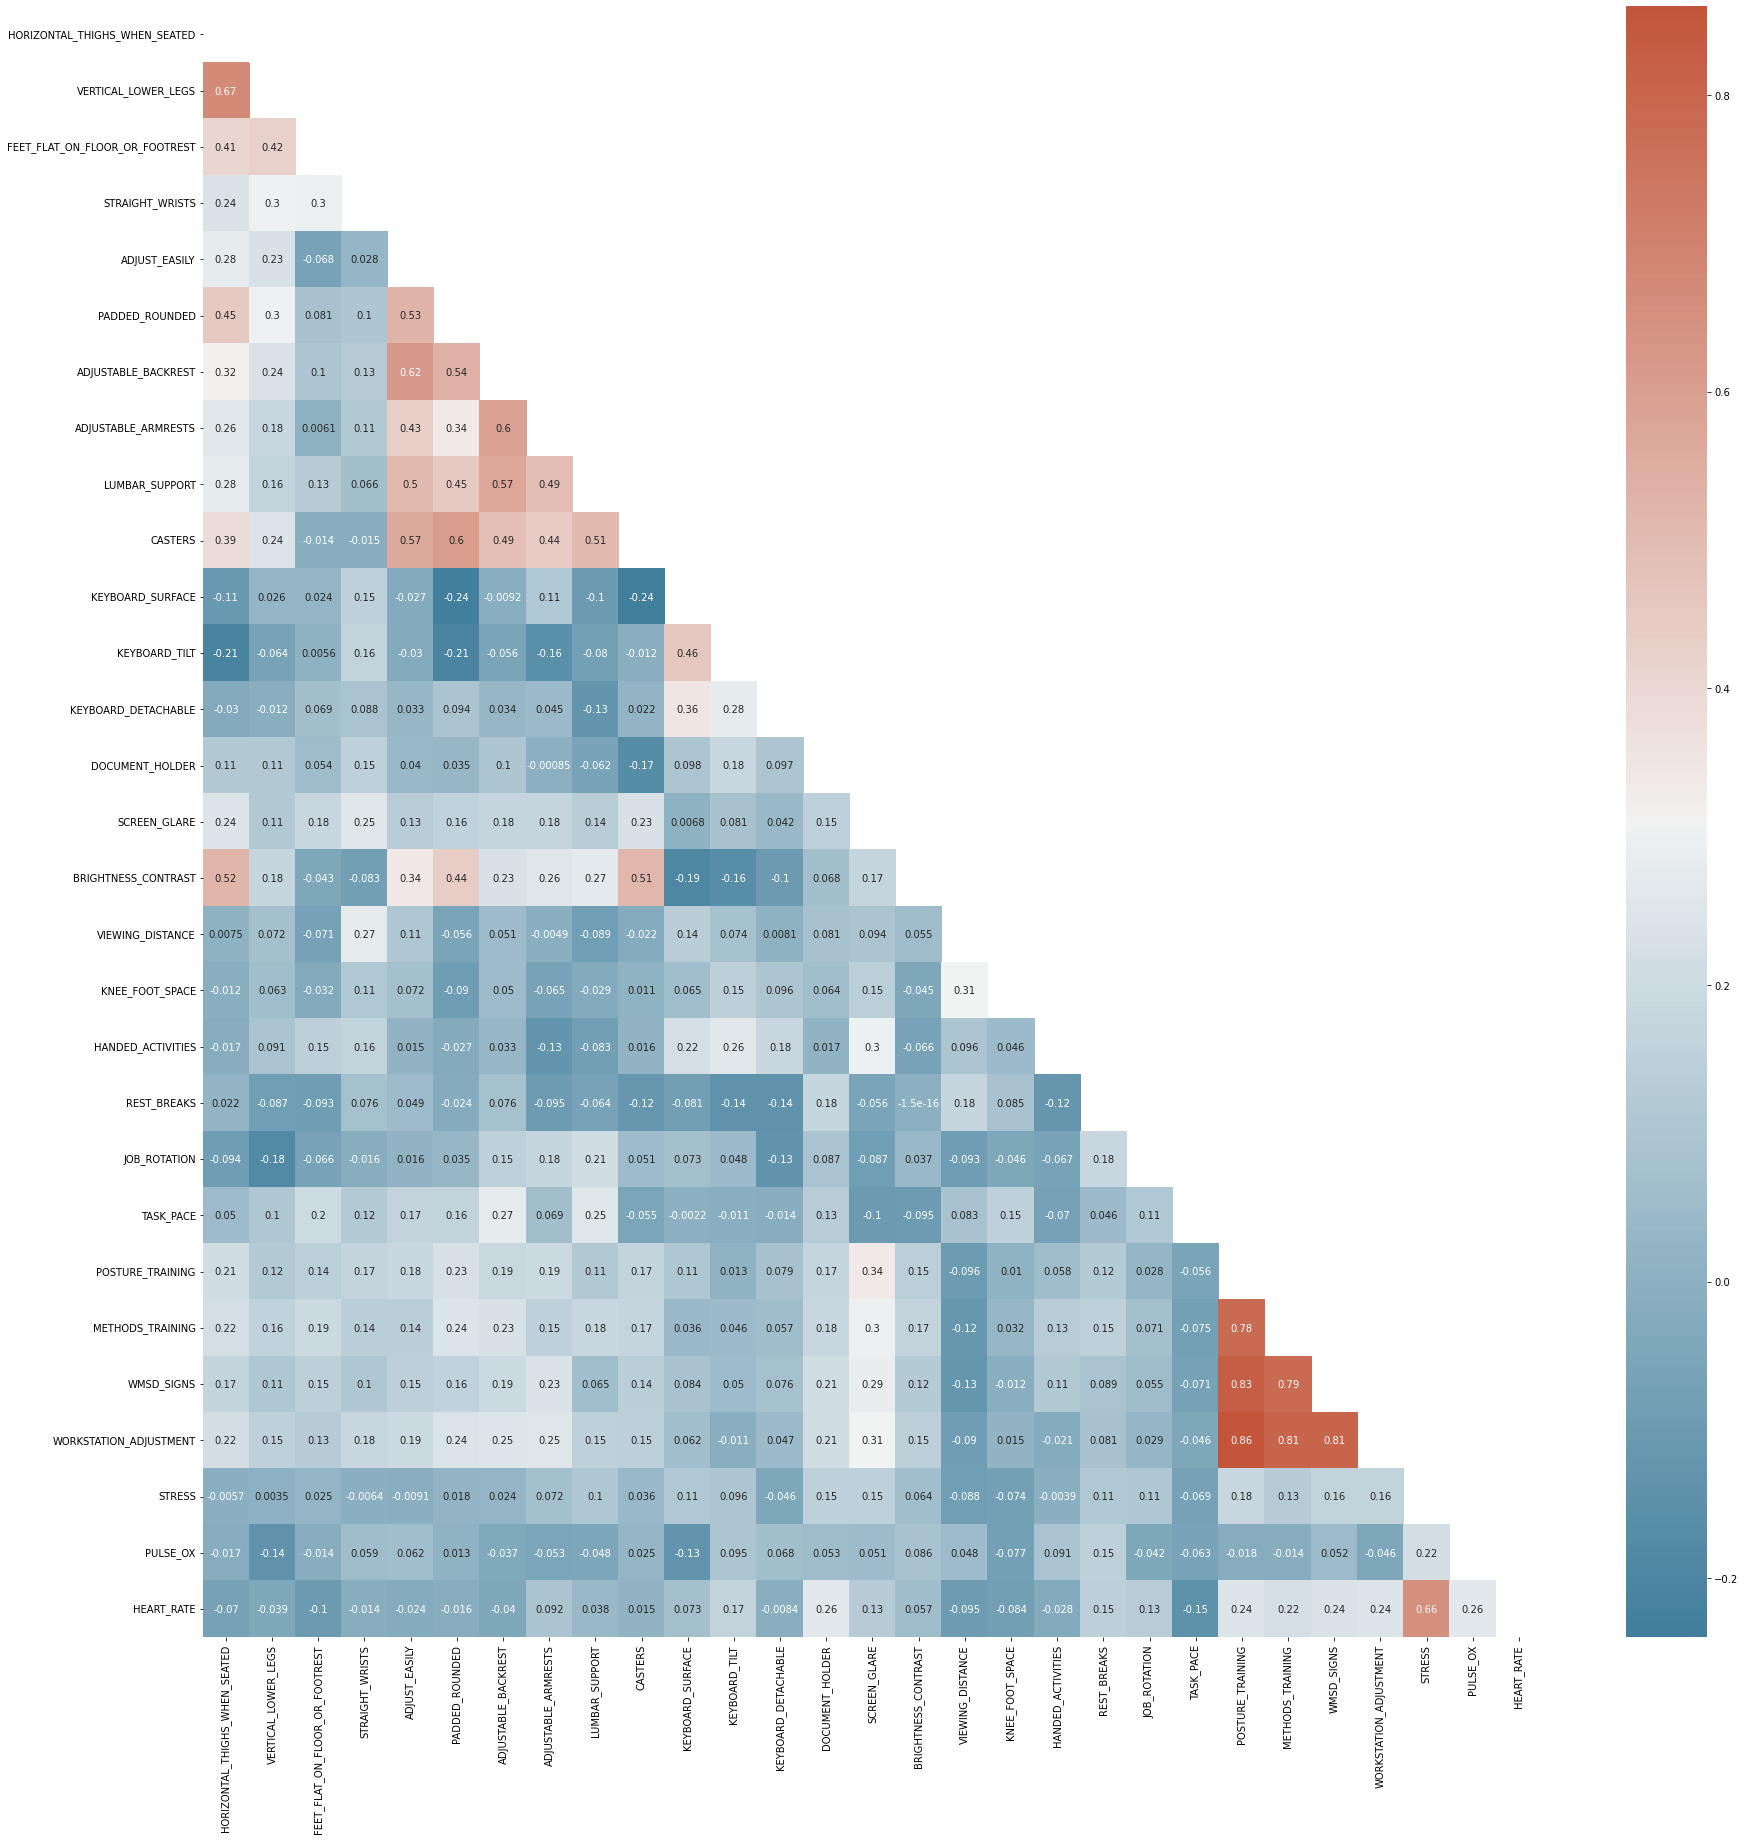

In [ ]:
def corr_heatmap(df):
  df = df.drop(['mbl_cod', 'rsp_id', 'ts', 'RESPIRATION', 'BODY_BATTERY', 'STEPS', 'CALORIES', 'FLOORS', 'INTENSITY_MINUTES', 'LONGITUDE', 'LATITUDE', 'AVG_AMP', 'VOX_ACTV'], axis=1)
  corr = df.corr()
  f, ax = plt.subplots(figsize=(30, 30))
  mask = np.triu(np.ones_like(corr, dtype=bool))
  cmap = sns.diverging_palette(230, 20, as_cmap=True)
  sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

# corr_heatmap(daily_am)
# corr_heatmap(daily_pm)
# corr_heatmap(daily_end)
corr_heatmap(comp_ws)

No indication of occupation or age in the survey, although there is a column about whether they have job rotations. There isn't enough information within the survey to necessarily support a correlation between the type of job and stress levels but we can look at how proper work methods, posture, and workstation adjustment affects the likelihood of WMSD. (can mention how we're exploring different forms of visualizations to best represent this because the data is binary; it only shows whether workers are trained in the right posture and work methods)

In [ ]:
from plotnine import *

(ggplot(comp_ws, aes(x='POSTURE_TRAINING', y='STRESS'))
 + geom_bar(stat='identity', width=0.5, fill='steelblue')
 + labs(title='How Proper Posture Affects Stress', x='POSTURE_TRAINING', y='STRESS')
)

In [ ]:
(ggplot(comp_ws, aes(x='WORKSTATION_ADJUSTMENT', y='STRESS'))
 + geom_bar(stat='identity', width=0.5, fill='steelblue')
 + labs(title='How Workstation Adjustment Affects Stress', x='WORKSTATION_ADJUSTMENT', y='STRESS')
)

In [ ]:
(ggplot(comp_ws, aes(x='WMSD_SIGNS', y='POSTURE_TRAINING'))
 + geom_bar(stat='identity', width=0.5, fill='steelblue')
 + labs(title='WMSD Symptoms vs Posture Training', x='WMSD_SIGNS', y='POSTURE_TRAINING')
)

In both barplots, where 1 is True and 2 is False for the presence of prior training in proper posture and work methods, we can see that generally, stress is lower when the worker has received proper training and higher when the worker did not receive proper training.

In [ ]:
from plotnine import *

daily_end.drop(daily_end[daily_end['HEART_RATE'] == 0].index, inplace = True)
daily_end.drop(daily_end[daily_end['STRESS'] == 0].index, inplace = True)
(ggplot(daily_end)
 + aes(x='HEART_RATE', y='STRESS', color='LOCATION_END')
 + geom_point()
 + labs(title='Heart Rate vs. Stress', x='HEART_RATE', y='STRESS')
)

In [ ]:
from plotnine import *

(ggplot(daily_end)
 + aes(x='HEART_RATE', y='STRESS', color='PULSE_OX')
 + geom_point()
 + labs(title='Heart Rate vs. Stress', x='HEART_RATE', y='STRESS')
)

## Insights related to Hypothesis

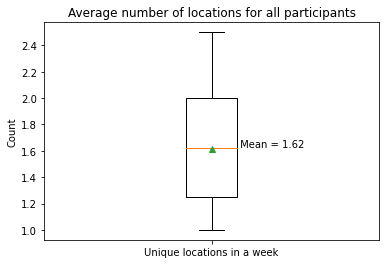

In [ ]:
# Check how many average locations per week for all participants
week_participant = daily_end.groupby(['rsp_id', 'Week']).agg(no_of_locations_per_week=('LOCATION_END', pd.Series.nunique))
location_count_for_all = week_participant.groupby('rsp_id')['no_of_locations_per_week'].mean()
fig, ax = plt.subplots()
bp = plt.boxplot(location_count_for_all, showmeans=True)

for i, line in enumerate(bp['medians']):
    x, y = line.get_xydata()[1]
    text = ' Mean = {:.2f}'.format(location_count_for_all.mean())
    plt.annotate(text,xy=(x, y))

plt.title('Average number of locations for all participants')
ax.set_xticklabels(['Unique locations in a week'])
plt.ylabel('Count')
plt.show()

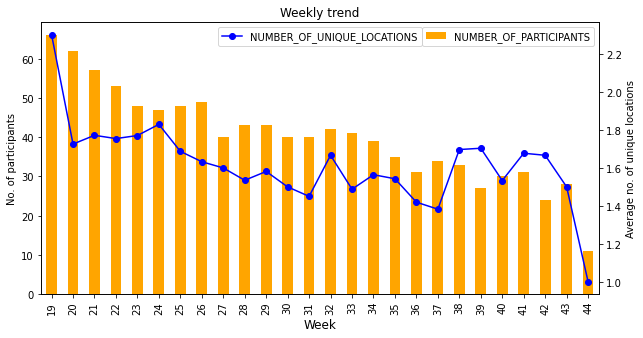

In [ ]:
# Check trends over the week
participants_by_week = daily_end.groupby('Week').agg({'rsp_id': pd.Series.nunique})
x = list(range(19,45))
y = list(participants_by_week['rsp_id'])
fig, ax = plt.subplots(figsize=(10, 5))
ax2 = ax.twinx()

weekly_data = daily_end.groupby(['Week', 'rsp_id'], as_index=False).agg({'LOCATION_END': pd.Series.nunique})
locations_per_week = weekly_data.groupby('Week')['LOCATION_END'].mean()

df = pd.concat([locations_per_week, participants_by_week], axis=1)
df = df.rename(columns={'rsp_id': 'NUMBER_OF_PARTICIPANTS', 'LOCATION_END': 'NUMBER_OF_UNIQUE_LOCATIONS'})
df = df.reset_index()

df['NUMBER_OF_PARTICIPANTS'].plot(kind='bar', ax=ax, color='orange')
df['NUMBER_OF_UNIQUE_LOCATIONS'].plot(kind='line', marker='o', color='blue', ax=ax2)
ax.yaxis.tick_left()
ax2.yaxis.tick_right()

plt.title("Weekly trend")
ax.set_xlabel("Week", fontsize=12)
ax.set_ylabel("No. of participants")
ax2.set_ylabel("Average no. of unique locations")
ax.legend()
ax2.legend(loc='upper center')
plt.xticks(range(0,26), x)
plt.show()

One pattern that we noticed is that a large pool of participants would work in high number of unique locations in one week and then work only in one location for the remaining weeks of the study.

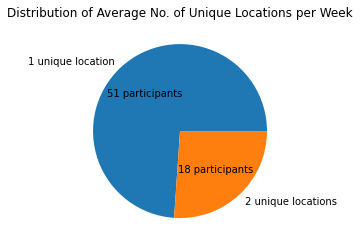

In [ ]:
import math
# Distribution of average number of locations in a week
num_locations_per_week = {i: 0 for i in range(1,3)}
for count in location_count_for_all:
    num_locations_per_week[math.floor(count)] += 1

count_locations = list(num_locations_per_week.keys())
count_participants = num_locations_per_week.values()
text1 = "{} unique location".format(count_locations[0])
text2 = "{} unique locations".format(count_locations[1])
labels = [text1, text2]

fig = plt.figure(facecolor='white', figsize=(8,4))

def absolute_value(val):
    a  = int(np.round(val/100.* sum(count_participants), 0))
    return "{} participants".format(a)

plt.pie(count_participants, labels=labels, autopct=absolute_value)
plt.title('Distribution of Average No. of Unique Locations per Week')
plt.show()

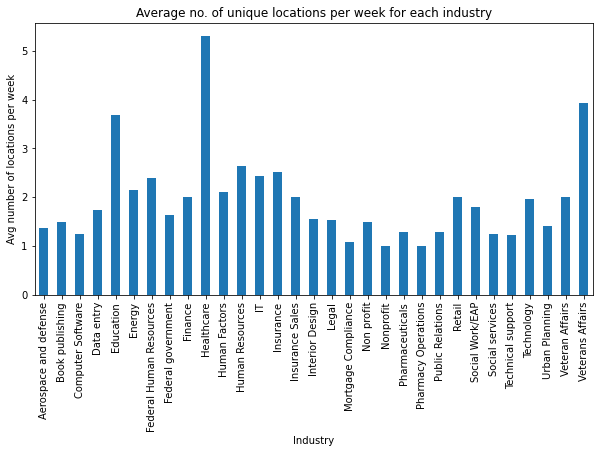

In [ ]:
# Average number of locations per week for each industry
week_industry = daily_end.groupby(['Industry', 'Week']).agg(no_of_locations_per_week=('LOCATION_END', pd.Series.nunique))
location_count_per_industry = week_industry.groupby('Industry')['no_of_locations_per_week'].mean()
fig = plt.figure(figsize=(10, 5))
location_count_per_industry.plot(kind='bar')

plt.title('Average no. of unique locations per week for each industry')
plt.ylabel('Avg number of locations per week')
plt.show()

Healthcare industry has the highest variation in terms of location or spaces in which its workers work in.

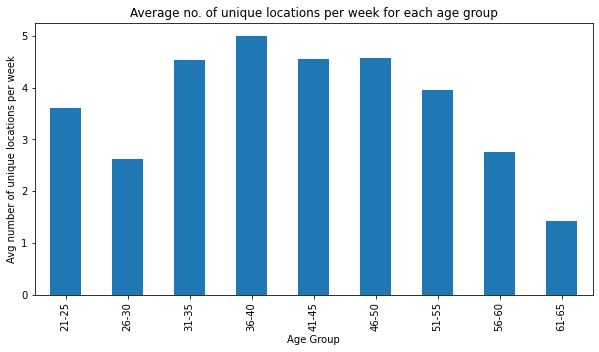

In [ ]:
# Average number of locations per week for each age group
week_age = daily_end.groupby(['AGE_GROUP', 'Week']).agg(no_of_locations_per_week=('LOCATION_END', pd.Series.nunique))
location_count_per_industry = week_age.groupby('AGE_GROUP')['no_of_locations_per_week'].mean()
fig = plt.figure(figsize=(10, 5))
location_count_per_industry.plot(kind='bar')

plt.title('Average no. of unique locations per week for each age group')
plt.xlabel('Age Group')
plt.ylabel('Avg number of unique locations per week')
plt.show()

Participants with age range between 36 and 40 tend to work in different locations.

In [ ]:
am_data = daily_am.loc[:, ['rsp_id', 'LOCATION_AM', 'STRESS', 'Industry', 'AGE_GROUP', 'Date', 'Week']]
pm_data = daily_pm.loc[:, ['rsp_id', 'LOCATION_PM', 'STRESS', 'Date']]
end_data = daily_end.loc[:, ['rsp_id', 'LOCATION_END', 'STRESS', 'DAILY_BREAKS', 'Date']]

am_data = am_data.rename(columns={'STRESS': 'STRESS_AM'})
pm_data = pm_data.rename(columns={'STRESS': 'STRESS_PM'})
end_data = end_data.rename(columns={'STRESS': 'STRESS_END'})

am_pm_data = pd.merge(am_data, pm_data,  how='left', left_on=['rsp_id','Date'], right_on = ['rsp_id','Date'])
daily_data = pd.merge(am_pm_data, end_data, how='left', left_on=['rsp_id','Date'], right_on = ['rsp_id','Date'])

# HANDLE NULL VALUES
daily_data = daily_data[daily_data['LOCATION_END'].notna()]
daily_data['STRESS_AM'] = daily_data['STRESS_AM'].fillna(0)
daily_data['STRESS_PM'] = daily_data['STRESS_PM'].fillna(0)
daily_data['STRESS_END'] = daily_data['STRESS_END'].fillna(0)

num_location_change = []

for index, row in daily_data.iterrows():
    # fill any NaN values
    if pd.isna(row['LOCATION_AM']):
        daily_data.at[index, 'LOCATION_AM'] = daily_data.at[index, 'LOCATION_END']
    if pd.isna(row['LOCATION_PM']):
        daily_data.at[index, 'LOCATION_PM'] = daily_data.at[index, 'LOCATION_END']

    count = 0
    if daily_data.at[index, 'LOCATION_AM'] != daily_data.at[index, 'LOCATION_PM']:
        count += 1
    if daily_data.at[index, 'LOCATION_PM'] != daily_data.at[index, 'LOCATION_END']:
        count += 1
    num_location_change.append(count)

daily_data['DAILY_LOCATION_CHANGE'] = num_location_change
daily_data['DAILY_LOCATION_TOTAL'] = daily_data['DAILY_LOCATION_CHANGE'] + 1
daily_data

,rsp_id,LOCATION_AM,STRESS_AM,Industry,AGE_GROUP,Date,Week,LOCATION_PM,STRESS_PM,LOCATION_END,STRESS_END,DAILY_BREAKS,DAILY_LOCATION_CHANGE,DAILY_LOCATION_TOTAL
0,32680,2.0,0.0,Healthcare,26-30,2022-05-09,19,2.0,0.0,1.0,0.0,4.0,1,2
1,32680,2.0,0.0,Healthcare,26-30,2022-05-10,19,2.0,66.5,4.0,0.0,6.0,1,2
2,32680,2.0,0.0,Healthcare,26-30,2022-05-11,19,7.0,0.0,2.0,0.0,4.0,2,3
3,32680,2.0,0.0,Healthcare,26-30,2022-05-12,19,7.0,0.0,4.0,0.0,5.0,2,3
4,32680,2.0,0.0,Healthcare,26-30,2022-05-16,20,2.0,0.0,5.0,0.0,6.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3306,32694,5.0,0.0,Technology,36-40,2022-05-11,19,7.0,0.0,2.0,0.0,3.0,2,3
3310,32694,2.0,0.0,Technology,36-40,2022-06-09,23,2.0,0.0,2.0,0.0,4.0,0,1
3313,32694,2.0,0.0,Technology,36-40,2022-08-18,33,5.0,0.0,1.0,0.0,4.0,2,3
3315,32694,1.0,0.0,Technology,36-40,2022-09-01,35,1.0,0.0,1.0,0.0,7.0,0,1


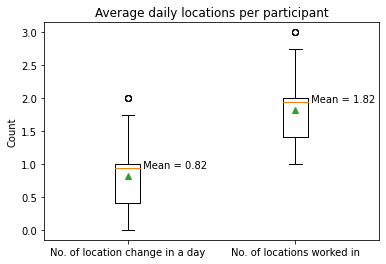

In [ ]:
avg_daily_locations_per_participant = daily_data.groupby('rsp_id')['DAILY_LOCATION_CHANGE'].mean()
avg_daily_total = daily_data.groupby('rsp_id')['DAILY_LOCATION_TOTAL'].mean()

figure, ax = plt.subplots()
bp = plt.boxplot([avg_daily_locations_per_participant, avg_daily_total], showmeans=True)
cols = [avg_daily_locations_per_participant, avg_daily_total]
labels = ['No. of location change in a day', 'No. of locations worked in']

for i, line in enumerate(bp['medians']):
    x, y = line.get_xydata()[1]
    text = ' Mean = {:.2f}'.format(cols[i].mean())
    plt.annotate(text,xy=(x, y))

plt.title('Average daily locations per participant')
ax.set_xticklabels(labels)
plt.ylabel('Count')
plt.show()

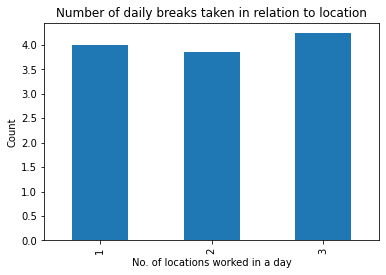

In [ ]:
breaks_and_location = daily_data.groupby('DAILY_LOCATION_TOTAL')['DAILY_BREAKS'].mean()
breaks_and_location.plot(kind='bar')
plt.title('Number of daily breaks taken in relation to location')
plt.xlabel('No. of locations worked in a day')
plt.ylabel('Count')
plt.show()

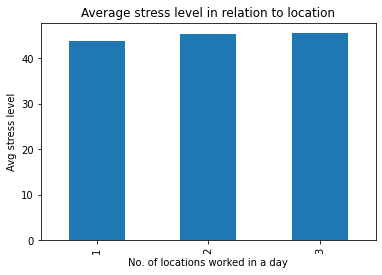

In [ ]:
daily_data['MAX_STRESS'] = daily_data[['STRESS_AM', 'STRESS_PM', 'STRESS_END']].max(axis=1)
stress_and_location = daily_data.groupby('DAILY_LOCATION_TOTAL')['MAX_STRESS'].mean()
stress_and_location.plot(kind='bar')
plt.title('Average stress level in relation to location')
plt.xlabel('No. of locations worked in a day')
plt.ylabel('Avg stress level')
plt.show()

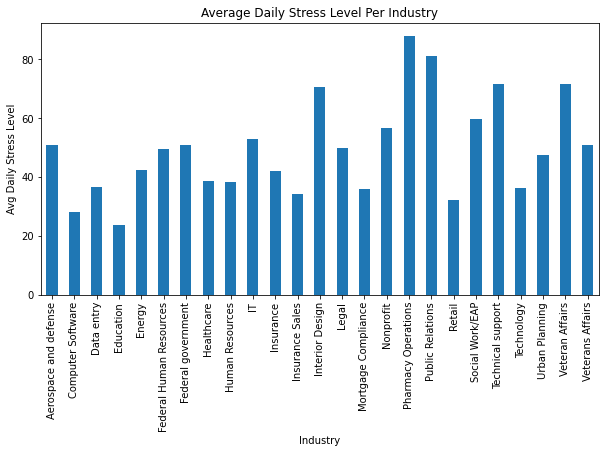

In [ ]:
stress_per_industry = daily_data.groupby('Industry')['MAX_STRESS'].mean()
fig = plt.figure(figsize=(10, 5))
stress_per_industry.plot(kind='bar')

plt.title('Average Daily Stress Level Per Industry')
plt.ylabel('Avg Daily Stress Level')
plt.show()

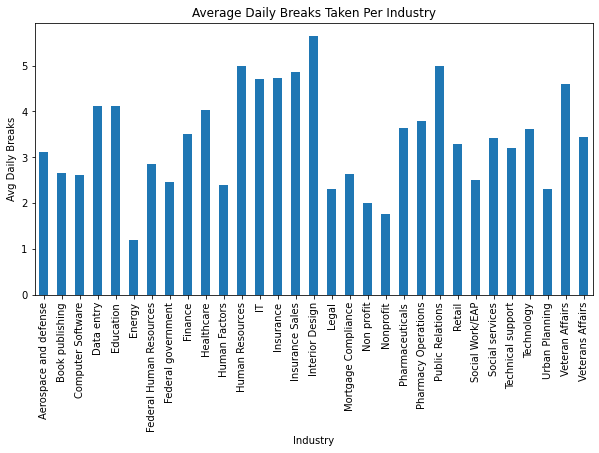

In [ ]:
breaks_per_industry = daily_data.groupby('Industry')['DAILY_BREAKS'].mean()
fig = plt.figure(figsize=(10, 5))
breaks_per_industry.plot(kind='bar')

plt.title('Average Daily Breaks Taken Per Industry')
plt.ylabel('Avg Daily Breaks')
plt.show()

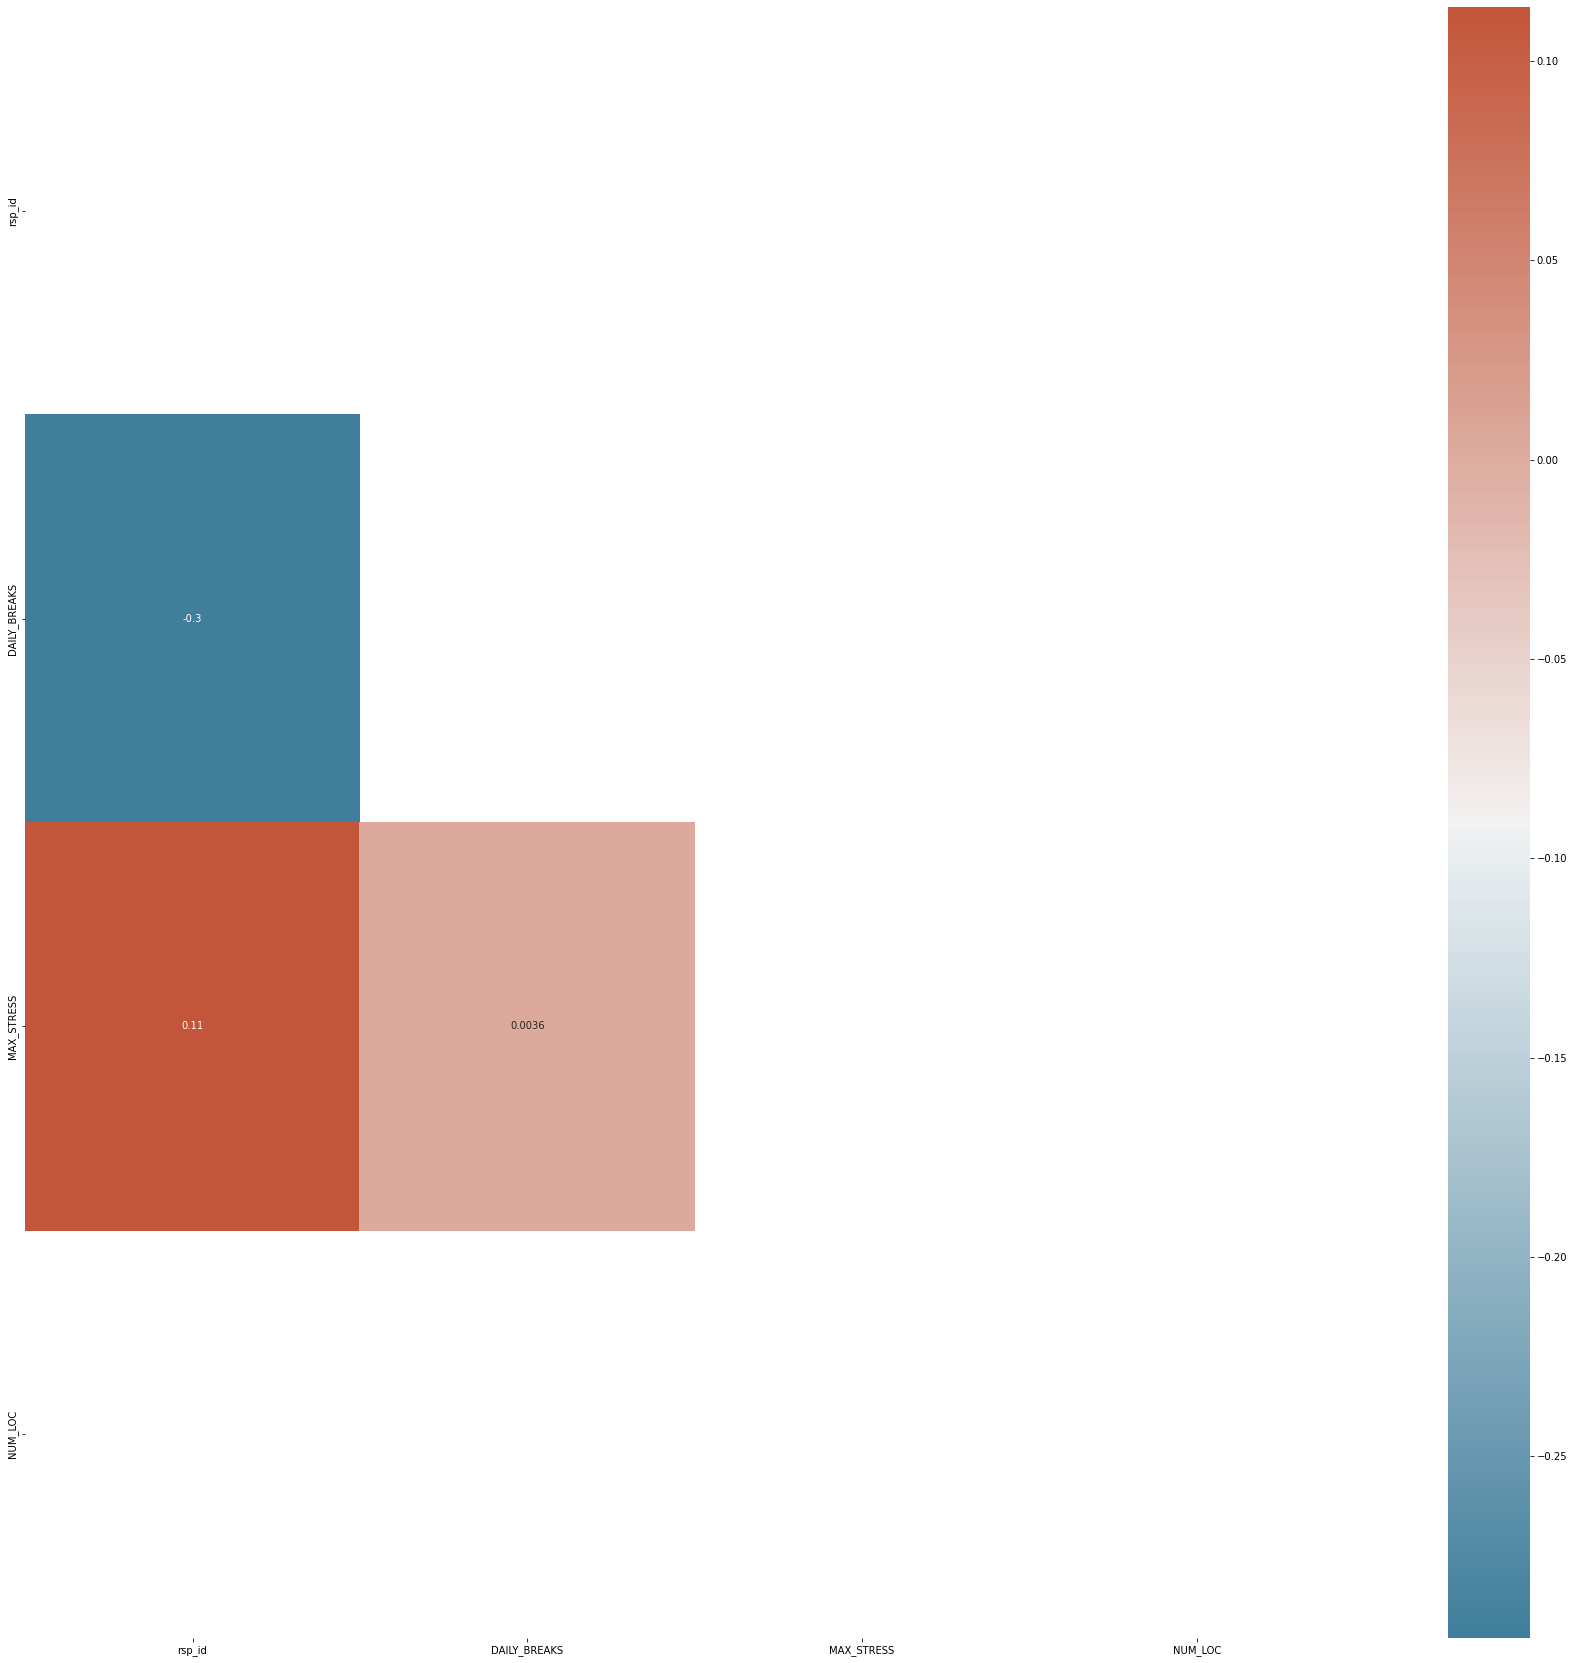

In [ ]:
daily_data['NUM_LOC'] = daily_data.groupby('rsp_id')['DAILY_LOCATION_TOTAL'].mean()
daily_data_copy = daily_data.copy()
daily_data_copy = daily_data_copy.drop(['LOCATION_AM', 'LOCATION_PM', 'LOCATION_END', 'STRESS_PM', 'STRESS_AM','STRESS_END', 'DAILY_LOCATION_CHANGE', 'DAILY_LOCATION_TOTAL', 'Date', 'Week'], axis=1)
corr = daily_data_copy.corr()
f, ax = plt.subplots(figsize=(30, 30))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

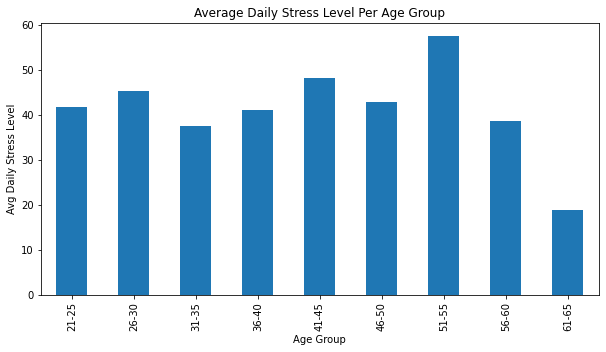

In [ ]:
stress_per_age = daily_data.groupby('AGE_GROUP')['MAX_STRESS'].mean()
fig = plt.figure(figsize=(10, 5))
stress_per_age.plot(kind='bar')

plt.title('Average Daily Stress Level Per Age Group')
plt.ylabel('Avg Daily Stress Level')
plt.xlabel('Age Group')
plt.show()

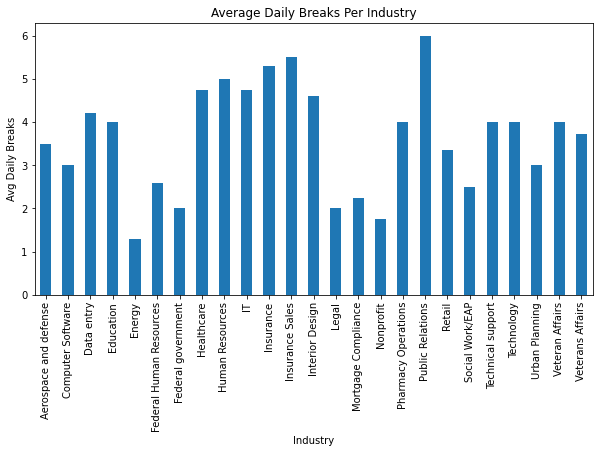

In [ ]:
breaks_per_industry = daily_data.groupby('Industry')['DAILY_BREAKS'].mean()
fig = plt.figure(figsize=(10, 5))
breaks_per_industry.plot(kind='bar')

plt.title('Average Daily Breaks Per Industry')
plt.ylabel('Avg Daily Breaks')
plt.show()

## Further Insights

In [ ]:
import folium 
from folium.plugins import HeatMap

boston_map = folium.Map(location=[42.3601, -71.0589])

location_count = daily_end.copy()
location_count = location_count[location_count['LATITUDE'] != 0]
location_count = location_count[location_count['LONGITUDE'] != 0]
location_count = location_count.groupby(['LONGITUDE','LATITUDE'], as_index=False)['LOCATION_END'].count()

# distribution of locations and its occurrence for the entire study
HeatMap(location_count).add_to(boston_map)
boston_map

In [ ]:
# Add number of weeks for each record
daily_end['local_time'] = pd.to_datetime(daily_end['local_time'])
daily_end['Week'] = daily_end['local_time'].dt.isocalendar().week

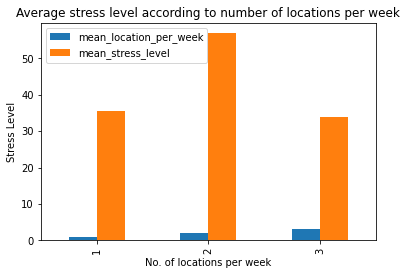

In [ ]:
# stress levels for # of locations
stress_level = daily_end.groupby(['rsp_id'], as_index=False).agg({'LOCATION_END': ['count'], 'STRESS': ['mean']})
stress_level.columns = ['rsp_id', 'total_location_count', 'mean_stress_level']
week = []

for index, row in stress_level.iterrows():
    rsp_id = row['rsp_id']
    temp = daily_end[daily_end['rsp_id'] == rsp_id]
    if temp['Week'].max() == temp['Week'].min():
        week.append(1)
    else:
        week.append(temp['Week'].max() - temp['Week'].min())

stress_level['weeks_participated'] = week
stress_level['mean_location_per_week'] = (stress_level['total_location_count'] / stress_level['weeks_participated']).apply(np.floor)

visualize = stress_level.groupby(['mean_location_per_week'], as_index=False)['mean_stress_level'].mean()
visualize = visualize.drop(labels=0, axis=0)
visualize.plot(kind='bar', title='Average stress level according to number of locations per week')
plt.xlabel('No. of locations per week')
plt.ylabel('Stress Level')
plt.show()

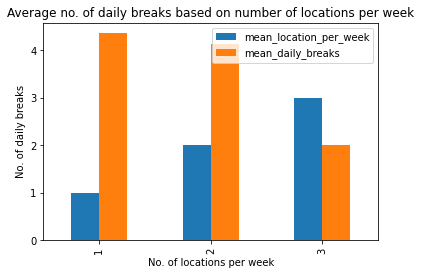

In [ ]:
breaks = daily_end.groupby(['rsp_id'], as_index=False).agg({'LOCATION_END': ['count'], 'DAILY_BREAKS': ['mean']})
breaks.columns = ['rsp_id', 'total_location_count', 'mean_daily_breaks']
breaks['mean_location_per_week'] = stress_level['mean_location_per_week']

visualize = breaks.groupby(['mean_location_per_week'], as_index=False)['mean_daily_breaks'].mean()
visualize = visualize.drop(labels=0, axis=0)
visualize.plot(kind='bar', title='Average no. of daily breaks based on number of locations per week')
plt.xlabel('No. of locations per week')
plt.ylabel('No. of daily breaks')
plt.show()

In [ ]:
daily_am['local_time'] = pd.to_datetime(daily_am['local_time'])
daily_pm['local_time'] = pd.to_datetime(daily_pm['local_time'])
daily_end['local_time'] = pd.to_datetime(daily_end['local_time'])

daily_am['Week'] = daily_am['local_time'].dt.isocalendar().week
daily_pm['Week'] = daily_pm['local_time'].dt.isocalendar().week
daily_end['Week'] = daily_end['local_time'].dt.isocalendar().week

friday_am['local_time'] = pd.to_datetime(friday_am['local_time'])
friday_pm['local_time'] = pd.to_datetime(friday_pm['local_time'])
friday_end['local_time'] = pd.to_datetime(friday_end['local_time'])

friday_am['Week'] = friday_am['local_time'].dt.isocalendar().week
friday_pm['Week'] = friday_pm['local_time'].dt.isocalendar().week
friday_end['Week'] = friday_end['local_time'].dt.isocalendar().week

In [ ]:
daily_am_weeks = daily_am['Week'].max() - daily_am['Week'].min()

daily_am['TOTAL_NUM_LOCATIONS'] = daily_am.groupby(['rsp_id'])['LOCATION_AM'].transform('count')
daily_am['AVG_NUM_LOCATIONS'] = daily_am['TOTAL_NUM_LOCATIONS'] // daily_am_weeks

# friday_am_weeks = friday_am['Week'].max() - friday_am['Week'].min()

# friday_am['TOTAL_NUM_LOCATIONS'] = friday_am.groupby(['rsp_id'])['LOCATION_AM'].transform('count')
# friday_am['AVG_NUM_LOCATIONS'] = (friday_am['TOTAL_NUM_LOCATIONS'] // friday_am_weeks) + 1

Correlation Matrix is : 


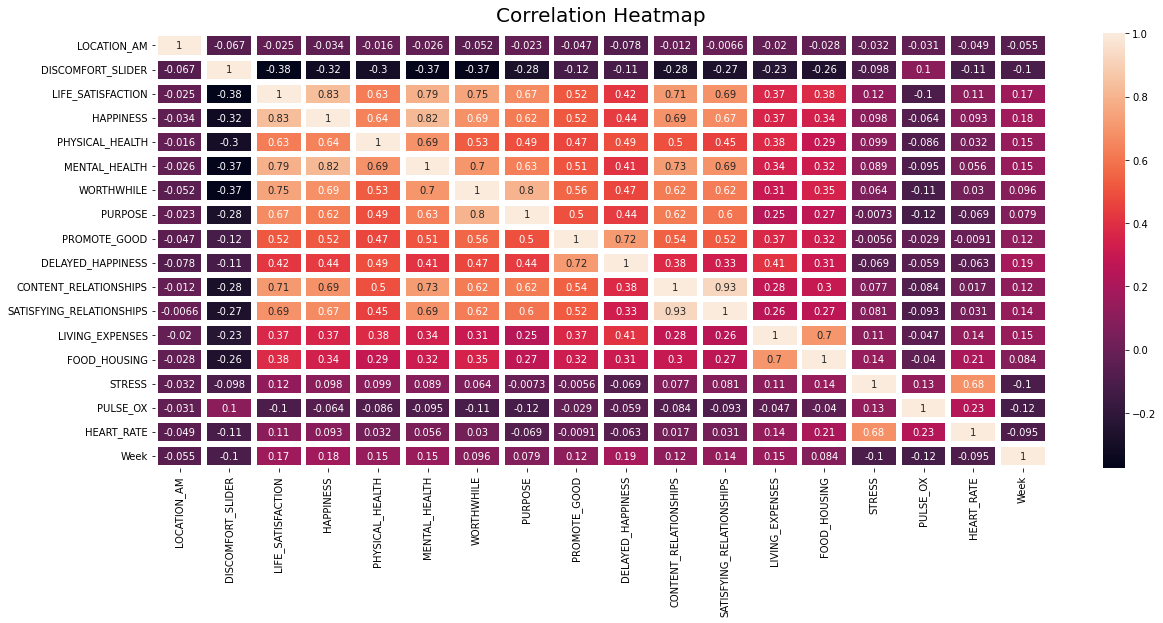

In [ ]:
corr_friday_am = friday_am.copy()
corr_friday_am = corr_friday_am.drop(['mbl_cod', 'rsp_id', 'ts', 'RESPIRATION', 'BODY_BATTERY', 'STEPS', 'CALORIES', 'FLOORS', 'INTENSITY_MINUTES', 'LONGITUDE', 'LATITUDE', 'AVG_AMP', 'VOX_ACTV'], axis=1)


matrix = corr_friday_am .corr()
print("Correlation Matrix is : ")
matrix

corr_friday_am['LOCATION_AM'] = corr_friday_am['LOCATION_AM'].fillna(0)
pd.isnull(corr_friday_am).sum()[pd.isnull(corr_friday_am).sum() > 0] 

def plot_corr(data_frame):
    corr_mat = corr_friday_am.corr(method = 'pearson',min_periods=1)
    plt.figure(figsize=(20, 8))
    heat_map = sns.heatmap(corr_mat, linewidths = 5,annot=True)
  
    heat_map.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);
    plt.show()

plot_corr(corr_friday_am)

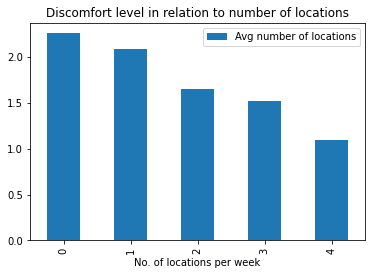

In [ ]:
visualize = daily_am.groupby(['AVG_NUM_LOCATIONS']).agg({'DISCOMFORT_SLIDER': ['mean']})
visualize.plot(kind='bar', title='Discomfort level in relation to number of locations')
labels = ['Avg number of locations', 'Avg tress level', 'Avg heart rate']
plt.legend(labels=labels)
plt.xlabel('No. of locations per week')
plt.show()

In [ ]:
visualize = friday_am.groupby(['AVG_NUM_LOCATIONS']).agg({'LIFE_SATISFACTION': ['mean'], 'HAPPINESS': ['mean']})
visualize.plot(kind='bar', title='Life satisfaction and happiness in relation to number of locations')
labels = ['Life satisfaction', 'Happiness']
plt.legend(labels=labels)
plt.xlabel('No. of locations per week')
plt.show()

KeyError: ignored

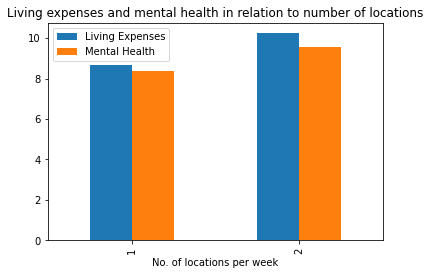

In [ ]:
friday_am_weeks = friday_am['Week'].max() - friday_am['Week'].min()
friday_am['TOTAL_NUM_LOCATIONS'] = friday_am.groupby(['rsp_id'])['LOCATION_AM'].transform('count')
friday_am['AVG_NUM_LOCATIONS'] = (friday_am['TOTAL_NUM_LOCATIONS'] // friday_am_weeks) + 1
visual = friday_am.groupby(['AVG_NUM_LOCATIONS']).agg({'LIVING_EXPENSES': ['mean'], 'MENTAL_HEALTH': ['mean']})
visual.plot(kind='bar', title='Living expenses and mental health in relation to number of locations')
labels = ['Living Expenses', 'Mental Health']
plt.legend(labels=labels)
plt.xlabel('No. of locations per week')
plt.show()

In [ ]:
(ggplot(daily_end)
 + aes(x='HEART_RATE', y='STRESS', color='PULSE_OX')
 + geom_point()
 + labs(title='Heart Rate vs. Stress', x='HEART_RATE', y='STRESS')
)

In [ ]:
stress_and_heart_rate = daily_end.groupby(['rsp_id'], as_index=False).agg({'LOCATION_END': ['count'], 'STRESS': ['mean'], 'HEART_RATE': ['mean']})
stress_and_heart_rate.columns = ['rsp_id', 'total_location_count', 'mean_stress', 'mean_heart_rate']
stress_and_heart_rate['mean_location_per_week'] = stress_level['mean_location_per_week']

labels = ['Location per week', 'Avg stress level', 'Avg heart rate']

visualize = stress_and_heart_rate.groupby(['mean_location_per_week'], as_index=False).agg({'mean_stress': ['mean'], 'mean_heart_rate': ['mean']})
visualize = visualize.drop(labels=[0,5], axis=0)
visualize.plot(kind='bar', title='Average stress level and heart rate in relation to number of locations per week')
plt.legend(labels=labels)
plt.xlabel('No. of locations per week')
plt.show()

KeyError: ignored

AM/PM Separate Analysis

AttributeError: ignored

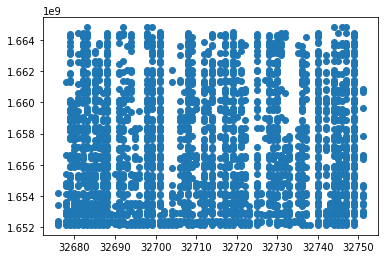

In [ ]:
from sklearn.linear_model import LinearRegression

stress = daily_end.groupby(['rsp_id'], as_index=False).agg({'LOCATION_END': ['count'], 'STRESS': ['mean']})
stress.columns = ['rsp_id', 'total_location_count', 'mean_stress', ]
stress['mean_location_per_week'] = stress_level['mean_location_per_week']

X = stress.iloc[:, 1].values.reshape(-1, 1)  
Y = stress.iloc[:, 2].values.reshape(-1, 1) 
linear_regressor = LinearRegression()  
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred,  title='Regression of Average stress level in relation to number of locations per week', color='red')
plt.show()